# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

# Exploratory Phase

In [3]:
male = df[(df.Gender == "Male")]
male = male["Age"]

In [4]:
female = df[(df.Gender == "Female")]
female = female["Age"]

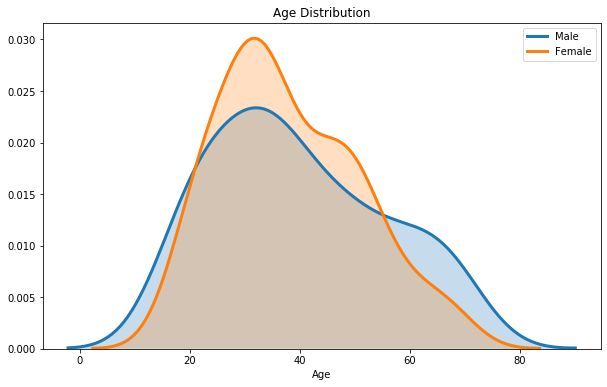

In [5]:
plt.figure(figsize=(10, 6))
sns.distplot(male, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                  label = "Male")
sns.distplot(female, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                  label = "Female")
plt.title('Age Distribution')
plt.savefig('age_distribution.png')

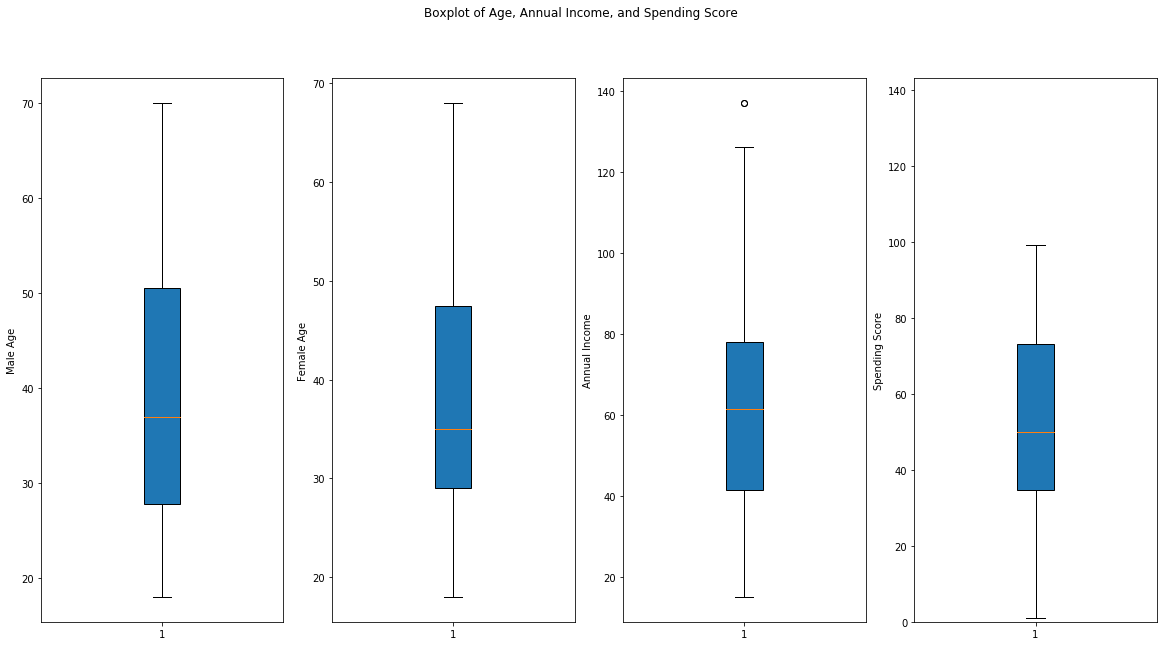

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(20, 10))
axs[0].boxplot(male, patch_artist = True)
axs[0].set_ylabel('Male Age')
axs[1].boxplot(female, patch_artist = True)
axs[1].set_ylabel('Female Age')
axs[2].boxplot(df["Annual Income (k$)"], patch_artist = True)
axs[2].set_ylabel("Annual Income")
axs[3].boxplot(df["Spending Score (1-100)"], patch_artist = True)
axs[3].set_ylabel("Spending Score")
axs[3].set_ylim([0,143])
plt.suptitle('Boxplot of Age, Annual Income, and Spending Score')
plt.savefig('boxplot.png')

In [7]:
male_only = df[(df.Gender == "Male")]
female_only = df[(df.Gender == "Female")]

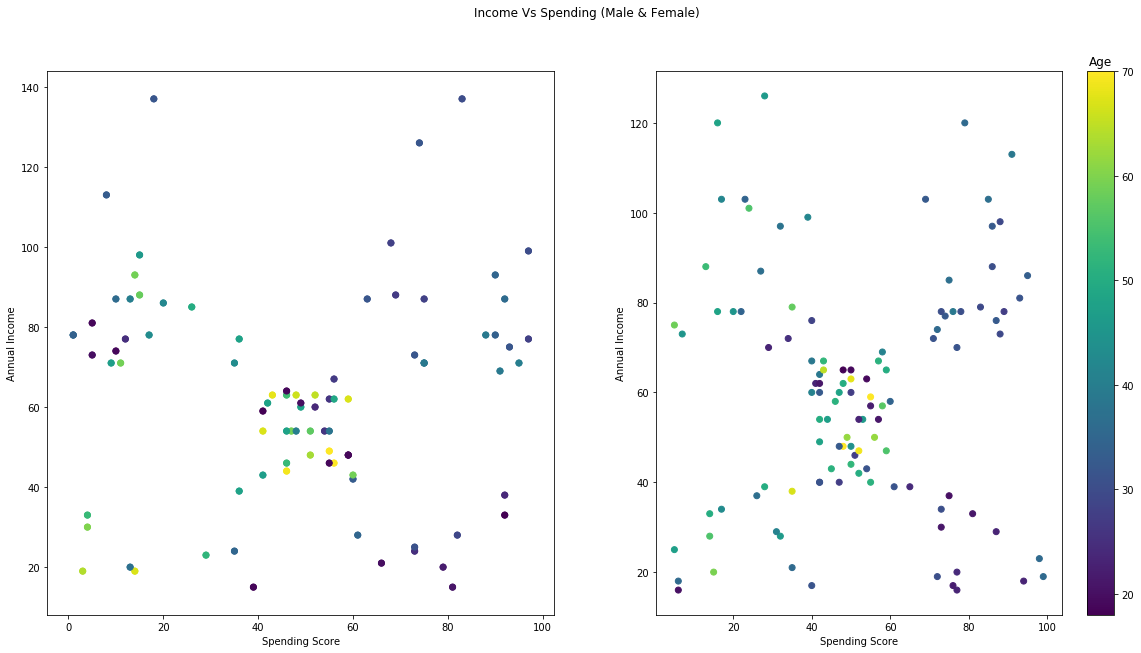

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.suptitle('Income Vs Spending (Male & Female)', x = 0.5, y = 0.97)
axs[0].scatter(x = male_only["Spending Score (1-100)"], y = male_only["Annual Income (k$)"],
               c = male_only["Age"], cmap='viridis')
axs[0].set_xlabel('Spending Score')
axs[0].set_ylabel('Annual Income')
axs[1].scatter(x = female_only["Spending Score (1-100)"], y = female_only["Annual Income (k$)"],
               c = female_only["Age"], cmap='viridis')
axs[1].set_xlabel('Spending Score')
axs[1].set_ylabel('Annual Income')

clb = fig.colorbar(axs[0].scatter(x = male_only["Spending Score (1-100)"], y = male_only["Annual Income (k$)"],
               c = male_only["Age"], cmap='viridis'))

clb.ax.set_title('Age')
plt.savefig('comparison.png')

In [9]:
X = df.iloc[:, [3,4,2]].values

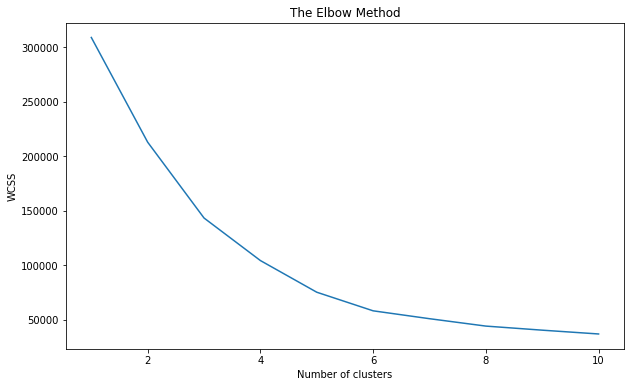

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [12]:
import plotly
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot

In [13]:
def getTrace(x, y, z, c, label, s=2):
    trace_points = go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(size=s, line=dict(color='rgb(0, 0, 0)', width=0.5), color=c, opacity=1),
    name=label
    )
    return trace_points;

def showGraph(title, x_colname, x_range, y_colname, y_range, z_colname, z_range, traces):
    layout = go.Layout(
    title=title,
    scene = dict(
    xaxis=dict(title=x_colname, range = x_range),
    yaxis=dict(title=y_colname, range = y_range),
    zaxis=dict(title=z_colname, range = z_range)
    )
    )

    fig = go.Figure(data=traces, layout=layout)
    init_notebook_mode(connected=True)
    iplot(fig, filename = "scatter.html")
    #plotly.offline.plot(fig)

In [14]:
centroids = getTrace(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s= 8, c = 'yellow', label='Centroids')
t1 = getTrace(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s= 4, c='red', label = 'Careful') #match with red=1 initial class
t2 = getTrace(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s= 4, c='black', label = 'Standard') #match with black=3 initial class
t3 = getTrace(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s= 4, c='blue', label = 'Careless') #match with blue=2 initial class
t4 = getTrace(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s= 4, c='green', label = 'Target') #match with green=0 initial class
t5 = getTrace(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s= 4, c='cyan', label = 'Sensible') #match with black=3 initial class

x=X[:,0]
y=X[:,1]
z=X[:,2]
showGraph("Customer Segmentation via K-Means", "Annual Income", [min(x),max(x)], "Spending Score", [min(y),max(y)],
          "Age", [min(z)-1,max(z)], [t1,t2,t3,t4,t5,centroids])

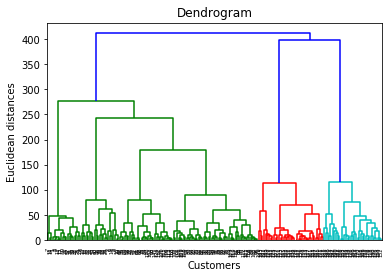

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.savefig('dendogram.png')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [17]:
#centroids = getTrace(hc.cluster_centers_[:, 0], hc.cluster_centers_[:, 1], hc.cluster_centers_[:, 2], s= 8, c = 'yellow', label='Centroids')
t1 = getTrace(X[y_hc == 0, 0], X[y_hc == 0, 1], X[y_hc == 0, 2], s= 4, c='red', label = 'Standard') #match with red=1 initial class
t2 = getTrace(X[y_hc == 1, 0], X[y_hc == 1, 1], X[y_hc == 1, 2], s= 4, c='black', label = 'Careful') #match with black=3 initial class
t3 = getTrace(X[y_hc == 2, 0], X[y_hc == 2, 1], X[y_hc == 2, 2], s= 4, c='blue', label = 'Target') #match with blue=2 initial class
t4 = getTrace(X[y_hc == 3, 0], X[y_hc == 3, 1], X[y_hc == 3, 2], s= 4, c='green', label = 'Careless') #match with green=0 initial class
t5 = getTrace(X[y_hc == 4, 0], X[y_hc == 4, 1], X[y_hc == 4, 2], s= 4, c='cyan', label = 'Sensible') #match with black=3 initial class

x=X[:,0]
y=X[:,1]
z=X[:,2]
showGraph("Customer Segmentation via Hierarchical Clustering", "Annual Income", [min(x),max(x)], "Spending Score", [min(y),max(y)],
          "Age", [min(z)-1,max(z)], [t1,t2,t3,t4,t5])